## Importing all the libraries

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

## load the dataset

mushroom dataset source:<br>
https://www.kaggle.com/uciml/mushroom-classification

In [38]:
# path to where the data lies
dpath = '/Users/qing/desktop/XGBoost/data/'
# data = pd.read_csv(dpath+"../data/mushrooms.csv")
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


### check if there is any null values

In [39]:
data.isnull().sum()
"""no missing value"""

'no missing value'

### check labels: poisonous or edible

In [40]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [41]:
print(data.dtypes)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


### check if 22 features(1st one is label) and 8124 instances

In [42]:
data.shape

(8124, 23)

### The dataset has values in strings.We need to convert all the unique values to integers. Thus we perform label encoding on the data

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [44]:
"""Separating features and label"""
X = data.iloc[:,1:23]  # all rows with features but without labels
y = data.iloc[:, 0]  # all rows with label only
print(X.head())
print(y.head())

   cap-shape  cap-surface  cap-color  ...  spore-print-color  population  habitat
0          5            2          4  ...                  2           3        5
1          5            2          9  ...                  3           2        1
2          0            2          8  ...                  3           2        3
3          5            3          8  ...                  2           3        5
4          5            2          3  ...                  3           0        1

[5 rows x 22 columns]
0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64


### Splitting the data into training and testing dataset

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

## default Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
model_LR= LogisticRegression()

In [47]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
# Returns the mean accuracy on the given test data and labels.
print("score is {}".format(model_LR.score(X_test, y_pred)))

score is 1.0


In [49]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print("accuracy is {}".format(auc_roc))

accuracy is 0.955473372781


## Logistic Regression(Tuned model)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], #
              'penalty':['l1','l2']
                   }
# C: Inverse of regularization strength, must be a positive float. 
# Similar in SVM, smaller values specify stronger regularization.

### GridSearch CV

In [0]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=5)

In [52]:
LR.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
print(LR.best_params_)

{'penalty': 'l2', 'C': 1000}


In [54]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
print("score is {}".format(LR.score(X_test, y_pred)))

score is 1.0


In [55]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print("accuracy is {}".format(auc_roc))

accuracy is 0.972830374753


## Default Decision Tree model

In [0]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

In [57]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
y_prob = model_tree.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_tree.score(X_test, y_pred)

1.0

In [59]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

## Let us tune the hyperparameters of the Decision tree model

In [0]:
from sklearn.tree import DecisionTreeClassifier

model_DD = DecisionTreeClassifier()


tuned_parameters= { 'max_features': ["auto","sqrt","log2"],
                  'min_samples_leaf': range(5,50,5) , 'max_depth': range(2,30,5)
                  }
#If “auto”, then max_features=sqrt(n_features).

In [74]:
from sklearn.model_selection import GridSearchCV
DD = GridSearchCV(model_DD, tuned_parameters,cv=5)
DD.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 7, 12, 17, 22, 27], 'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40, 45]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [84]:
# print(DD.cv_results_)
print(DD.best_score_)
print(DD.best_params_)

0.9998461301738729
{'max_features': 'log2', 'max_depth': 12, 'min_samples_leaf': 5}


In [76]:
y_prob = DD.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
DD.score(X_test, y_pred)

1.0

In [78]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       845
           1       0.99      1.00      1.00       780

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Default Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

In [80]:
model_RR.fit(X_train,y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
y_prob = model_RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_RR.score(X_test, y_pred)

1.0

In [82]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

## Let us tuned the parameters of Random Forest just for the purpose of knowledge
1) max_features 2) n_estimators 3) min_sample_leaf

In [0]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

In [87]:
from sklearn.model_selection import GridSearchCV
RR = GridSearchCV(model_RR, tuned_parameters,cv=5)
RR.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
# print(RR.grid_scores_)
print(RR.best_score_)
print(RR.best_params_)

1.0
{'max_features': 'sqrt', 'n_estimators': 60, 'min_samples_leaf': 10}


In [90]:
y_prob = RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR.score(X_test, y_pred)

1.0

In [91]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

## Default XGBoost

In [0]:
from xgboost import XGBClassifier
model_XGB=XGBClassifier()

In [93]:
model_XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [94]:
y_prob = model_XGB.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_XGB.score(X_test, y_pred)

1.0

In [95]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

### 特征重要性
在XGBoost中特征重要性已经自动算好，存放在feature_importances_

In [96]:
print(model_XGB.feature_importances_)

[0.00200508 0.00301184 0.01164484 0.0050957  0.06542522 0.
 0.01254669 0.09593841 0.4388894  0.031197   0.02373331 0.01908208
 0.01817624 0.04222913 0.00920601 0.         0.         0.00674974
 0.         0.08038267 0.12050713 0.01417955]


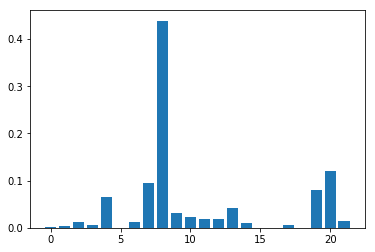

In [97]:
# plot
from matplotlib import pyplot
pyplot.bar(range(len(model_XGB.feature_importances_)), model_XGB.feature_importances_)
pyplot.show()

上述表是按特征顺序打印，还可以使用XGBoost内嵌的函数，按特征重要性排序

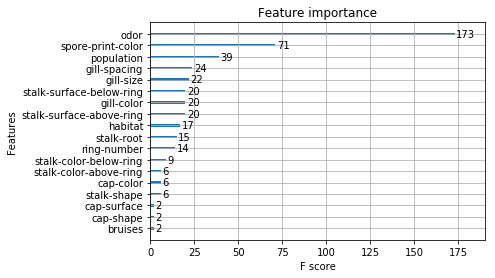

In [98]:
# plot feature importance using built-in function
from xgboost import plot_importance
plot_importance(model_XGB)
pyplot.show()

可以根据特征重要性进行特征选择

In [99]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# Fit model using each importance as a threshold
thresholds = sort(model_XGB.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model_XGB, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],
      accuracy*100.0))

Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.002, n=18, Accuracy: 100.00%
Thresh=0.003, n=17, Accuracy: 100.00%
Thresh=0.005, n=16, Accuracy: 100.00%
Thresh=0.007, n=15, Accuracy: 100.00%
Thresh=0.009, n=14, Accuracy: 100.00%
Thresh=0.012, n=13, Accuracy: 100.00%
Thresh=0.013, n=12, Accuracy: 100.00%
Thresh=0.014, n=11, Accuracy: 100.00%
Thresh=0.018, n=10, Accuracy: 100.00%
Thresh=0.019, n=9, Accuracy: 100.00%
Thresh=0.024, n=8, Accuracy: 100.00%
Thresh=0.031, n=7, Accuracy: 99.57%
Thresh=0.042, n=6, Accuracy: 99.57%
Thresh=0.065, n=5, Accuracy: 99.57%
Thresh=0.080, n=4, Accuracy: 98.34%
Thresh=0.096, n=3, Accuracy: 88.55%
Thresh=0.121, n=2, Accuracy: 85.60%
Thresh=0.439, n=1, Accuracy: 80.98%
